# Computergestützte Mathematik zur Analysis

Vorlesung vom 10.12.2020

*Prof. Dr. Rüdiger Braun*

In [1]:
from sympy import *
init_printing()

## Polarkoordinaten

In [2]:
r = Symbol('r', positive=True)
phi = Symbol('phi', real=True)
x = r*cos(phi)
y = r*sin(phi)
x, y

In [3]:
r == simplify(sqrt(x**2+y**2))

True

In [4]:
phi == tan(y/x)

False

Das ist tatsächlich falsch, da $\phi$ nur bis auf ein ganzes Vielfaches von $\pi$ bestimmt ist.

In [5]:
tan(phi) == tan(phi+pi)

True

Deswegen kann $\phi$ nicht durch den $\arctan$ ausgedrückt werden.

In [6]:
atan2(1,0)

In [7]:
atan2(0,1)

In [8]:
atan2(-1,0)

In [9]:
atan2(0,-1)

In [10]:
x == r*cos(atan2(y,x)).simplify()

True

In [11]:
phi == atan2(y,x)

False

Tatsächlich falsch, weil $\phi$ nicht aus dem Intervall $(-\pi,\pi]$ stammen muss.

Übung:  $\tan(y/x)$ und `atan2(y,x)` plotten.

## Potenzfunktionen

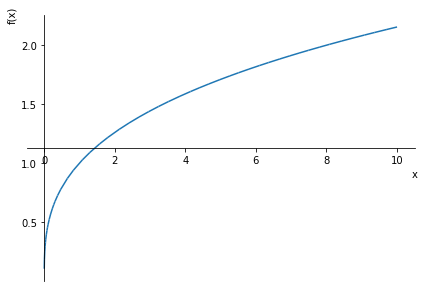

In [12]:
x = S('x')
f = x**Rational(1,3)
plot(f);

In [13]:
f.subs(x, -1)

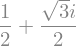

In [14]:
f.subs(x, -1).expand(complex=True)

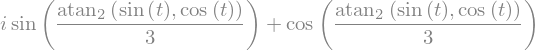

In [15]:
t = Symbol('t', real=True)
f.subs(x,(exp(I*t))).expand(complex=True).trigsimp()

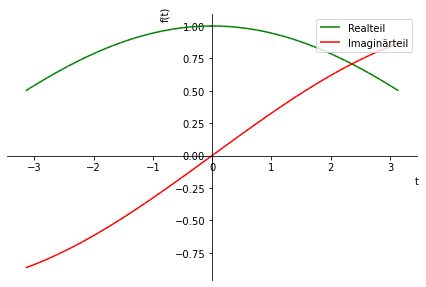

In [16]:
p1 = plot(re(f.subs(x, exp(I*t))), (t, -pi, pi), line_color='green', label="Realteil", show=False)
p2 = plot(im(f.subs(x, exp(I*t))), (t,-pi, pi), line_color='red', label="Imaginärteil", show=False)
p1.append(p2[0])
p1.legend = True
p1.show()

In [17]:
h = sign(x)*abs(x)**Rational(1,3)
h

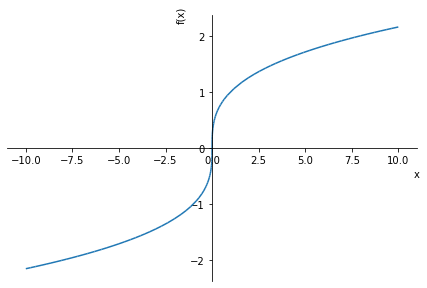

In [18]:
plot(h);

## nutzergesteuerte trigonometrische Vereinfachungen

In [19]:
x = S('x')
y = S('y')
b = sin(x) + sin(y)
b

In [20]:
b.trigsimp()

In [21]:
b.trigsimp(method='fu')

Wie kompliziert ist dieser Ausdruck?

In [22]:
b.count_ops(visual=True)

In [28]:
def my_measure(expr):
    opc = expr.count_ops(visual=True)
    print(opc)  # zur Fehlersuche
    strafe = {}
    strafe['ADD'] = 1
    strafe['SIN'] = 1
    strafe['MUL'] = -100
    return opc.subs(strafe)

In [29]:
my_measure(b)

ADD + 2*SIN


In [31]:
# b.trigsimp(method='fu', measure=my_measure)  # TypeError

In [32]:
def my_measure(expr):
    opc = expr.count_ops(visual=True)
    # print(opc)  # zur Fehlersuche
    strafe = {}
    strafe['ADD'] = 1
    strafe['SIN'] = 1
    strafe['MUL'] = -100
    strafe['COS'] = 1
    strafe['DIV'] = 1
    strafe['SUB'] = 1
    return opc.subs(strafe)

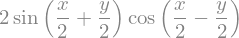

In [33]:
c = b.trigsimp(method='fu', measure=my_measure)
c

In [34]:
c.trigsimp()

In [35]:
d = sin(x)**8

In [36]:
def my_measure(expr):
    opc = expr.count_ops(visual=True)
    # print(opc)  # zur Fehlersuche
    strafe = {}
    strafe['ADD'] = 1
    strafe['SIN'] = 100
    strafe['MUL'] = 1
    strafe['COS'] = 1
    strafe['DIV'] = 1
    strafe['SUB'] = 1
    strafe['POW'] = 1
    return opc.subs(strafe)

In [37]:
d.trigsimp(method='fu', measure=my_measure)

## nutzergesteuertes `simplify`

In [38]:
x = Symbol('x', positive=True)
y = Symbol('y', positive=True)

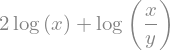

In [39]:
a = log(x/y) + 2*log(x)
a

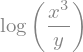

In [40]:
a.simplify()

Ich will aber $x$- und die $y$-Terme getrennt lassen

In [41]:
def my_measure(expr):
    opc = expr.count_ops(visual=True)
    # print(opc)  # zur Fehlersuche
    strafe = {}
    strafe['ADD'] = 1
    strafe['MUL'] = 1
    strafe['DIV'] = 10
    strafe['SUB'] = 1
    strafe['POW'] = 1
    strafe['LOG'] = 1
    return opc.subs(strafe)

In [42]:
a.simplify(measure=my_measure)

## Reihenentwicklungen

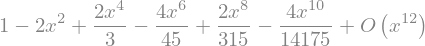

In [43]:
f = cos(2*x)
f.series(x, n=12)

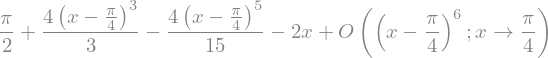

In [44]:
f.series(x, pi/4)

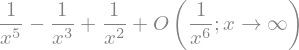

In [47]:
g = 1/(x**2+x+1)
gs = g.series(x, oo)
gs

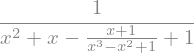

In [48]:
g1 = gs.removeO()
1/(1/g1).ratsimp()

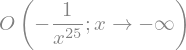

In [49]:
h = exp(x)
h.series(x, -oo, n=25)

In [50]:
h.series(x, oo)

In [51]:
exp(sqrt(x+1)).series(x, oo)

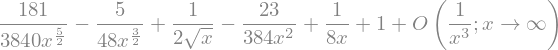

In [52]:
r = exp(sqrt(x+1)-sqrt(x))
r_ser = r.series(x, oo, n=3)
r_ser

In [53]:
a = Symbol('a')

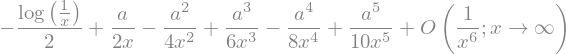

In [54]:
b_ser = log(sqrt(x+a)).series(x, oo)
b_ser

## Beispiel mit der Lambert-Funktion

In [55]:
glg = Eq(log(x), x-a)
glg

In [56]:
lsg = solve(glg, x)
f = lsg[0]
f

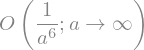

In [57]:
f.series(a, oo)

In [58]:
y = S('y')
g = f.subs(exp(-a), y)
g

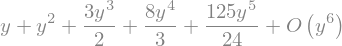

In [59]:
g_ser = g.series(y, 0)
g_ser

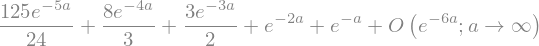

In [60]:
f_ser = g_ser.subs(y, exp(-a))
f_ser

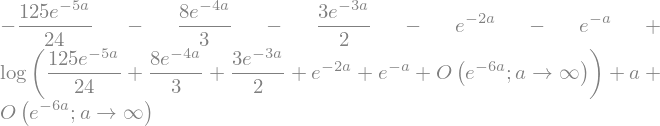

In [61]:
tmp = (glg.lhs - glg.rhs).subs(x, f_ser)
tmp

In [ ]:
#tmp.series(a, oo)  # ValueError

In [62]:
glg1 = glg.subs(a, -log(y))
glg1  

In [63]:
lsg1 = solve(glg1, x)
f1 = lsg1[0]
f1

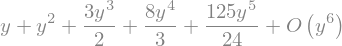

In [65]:
f1_ser = f1.series(y, 0)
f1_ser

In [66]:
(glg1.lhs - glg1.rhs).subs(x, f1_ser).series(y, 0, n=5)

In [ ]:
#(glg1.lhs - glg1.rhs).subs(x, f1_ser).series(y, 0, n=6)  # ValueError